# XGBoost

In [2]:
import xgboost

In [ ]:
#!pip install xgboost

In [3]:
import os
os.getcwd()

'/Users/journnie/Desktop/asia/aepython/machine_learning/300.Classification'

In [4]:
# 관련 파일 임포트

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 위스콘신 유방암 데이터셋

In [ ]:
#데이터 준비

In [7]:
b_cancer = load_breast_cancer()
b_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
#b_cancer를 데이터프레임으로 만드시오(cancer_df)
# 마지막열을 "target"으로 명명하고 결과값을 할당한다.
cancer_df = pd.DataFrame(data = b_cancer, columns = b_cancer.feature_names)
cancer_df["target"] = b_cancer.target
X = b_cancer.data
y = b_cancer.target
# 데이터 분할
# test_size=0.2, random_state=156
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [11]:
### 틀림
b_cancer = load_breast_cancer()


#b_cancer를 데이터프레임으로 만드시오(cancer_df)
# 마지막열을 "target"으로 명명하고 결과값을 할당한다.

cancer_df = pd.DataFrame(b_cancer.data)
cancer_df["target"] = cancer_df.iloc[:,-1]

X = cancer_df.iloc[:,:-1]
y = cancer_df["target"]


# 데이터 분할
# test_size=0.2, random_state=156
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [15]:
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: target
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [ ]:
### 1. 조기종료 옵션을 사용하지 않는 경우

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=156)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
print(f'train_score: {accuracy_score(y_train, y_pred_train)}')
y_pred_test = xgb.predict(X_test)
print(f'test_score: {accuracy_score(y_test, y_pred_test)}')


train_score: 0.9978021978021978
test_score: 0.956140350877193


In [31]:
### 2.1. 조기 종료 옵션을 사용한 경우
# save_best = True를 사용하지 않는 경우
# early_stopping_rounds만 사용
# xgb2 = xgb.fit(X_train, y_train, early_stopping_rounds=100, 
#         eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=True)

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=156)
xgb.fit(X_train, y_train, early_stopping_rounds=3, eval_metric='logloss', 
        eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-logloss:0.62691
[1]	validation_0-logloss:0.57179
[2]	validation_0-logloss:0.52400
[3]	validation_0-logloss:0.48020
[4]	validation_0-logloss:0.44496
[5]	validation_0-logloss:0.41438
[6]	validation_0-logloss:0.38875
[7]	validation_0-logloss:0.36277
[8]	validation_0-logloss:0.34059
[9]	validation_0-logloss:0.32333
[10]	validation_0-logloss:0.30527
[11]	validation_0-logloss:0.29085
[12]	validation_0-logloss:0.27735
[13]	validation_0-logloss:0.26565
[14]	validation_0-logloss:0.25403
[15]	validation_0-logloss:0.24536
[16]	validation_0-logloss:0.23697
[17]	validation_0-logloss:0.22749
[18]	validation_0-logloss:0.22091
[19]	validation_0-logloss:0.21436
[20]	validation_0-logloss:0.20803
[21]	validation_0-logloss:0.20271
[22]	validation_0-logloss:0.19965
[23]	validation_0-logloss:0.19494
[24]	validation_0-logloss:0.19098
[25]	validation_0-logloss:0.18648
[26]	validation_0-logloss:0.18277
[27]	validation_0-logloss:0.18109
[28]	validation_0-logloss:0.17621
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=156, ...)

In [37]:
### 2.2. 조기 종료 옵션을 사용한 경우
# save_best = True를 사용하여 가장 평가점수가 좋은 모델을 사용하려면
# callback.EarlyStopping을 사용해야함
# xgb2 = xgb.fit(X_train, y_train, early_stopping_rounds=100, 
#         eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=True)
from xgboost import XGBClassifier
from xgboost import callback

early_stop = callback.EarlyStopping(rounds=2, metric_name='logloss', save_best=True)

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=1, random_state=156,
                    callbacks=[early_stop])
xgb.fit(X_train, y_train, early_stopping_rounds=3, eval_metric='logloss', 
        eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-logloss:0.62691
[1]	validation_0-logloss:0.57179
[2]	validation_0-logloss:0.52400
[3]	validation_0-logloss:0.48020
[4]	validation_0-logloss:0.44496
[5]	validation_0-logloss:0.41438
[6]	validation_0-logloss:0.38875
[7]	validation_0-logloss:0.36277
[8]	validation_0-logloss:0.34059
[9]	validation_0-logloss:0.32333
[10]	validation_0-logloss:0.30527
[11]	validation_0-logloss:0.29085
[12]	validation_0-logloss:0.27735
[13]	validation_0-logloss:0.26565
[14]	validation_0-logloss:0.25403
[15]	validation_0-logloss:0.24536
[16]	validation_0-logloss:0.23697
[17]	validation_0-logloss:0.22749
[18]	validation_0-logloss:0.22091
[19]	validation_0-logloss:0.21436
[20]	validation_0-logloss:0.20803
[21]	validation_0-logloss:0.20271
[22]	validation_0-logloss:0.19965
[23]	validation_0-logloss:0.19494
[24]	validation_0-logloss:0.19098
[25]	validation_0-logloss:0.18648
[26]	validation_0-logloss:0.18277
[27]	validation_0-logloss:0.18109
[28]	validation_0-logloss:0.17621
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x191b219d0>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=156, ...)

In [26]:
# * 하이퍼파라미터 튜닝( 조기종료 옵션 사용)

y_pred_train = xgb2.predict(X_train)
print(f'train_score: {accuracy_score(y_train, y_pred_train)}')
y_pred_test = xgb2.predict(X_test)
print(f'test_score: {accuracy_score(y_test, y_pred_test)}')

train_score: 0.9978021978021978
test_score: 0.956140350877193


In [ ]:
# 조기종료 모델에 대한 평가(early_stopping_rounds:100)



In [ ]:
# 조기종료 모델 구축 및 평가(early_stopping_rounds=10)

In [30]:
pd.Series(b_cancer.feature_names)

0                 mean radius
1                mean texture
2              mean perimeter
3                   mean area
4             mean smoothness
5            mean compactness
6              mean concavity
7         mean concave points
8               mean symmetry
9      mean fractal dimension
10               radius error
11              texture error
12            perimeter error
13                 area error
14           smoothness error
15          compactness error
16            concavity error
17       concave points error
18             symmetry error
19    fractal dimension error
20               worst radius
21              worst texture
22            worst perimeter
23                 worst area
24           worst smoothness
25          worst compactness
26            worst concavity
27       worst concave points
28             worst symmetry
29    worst fractal dimension
dtype: object

* 시각화

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

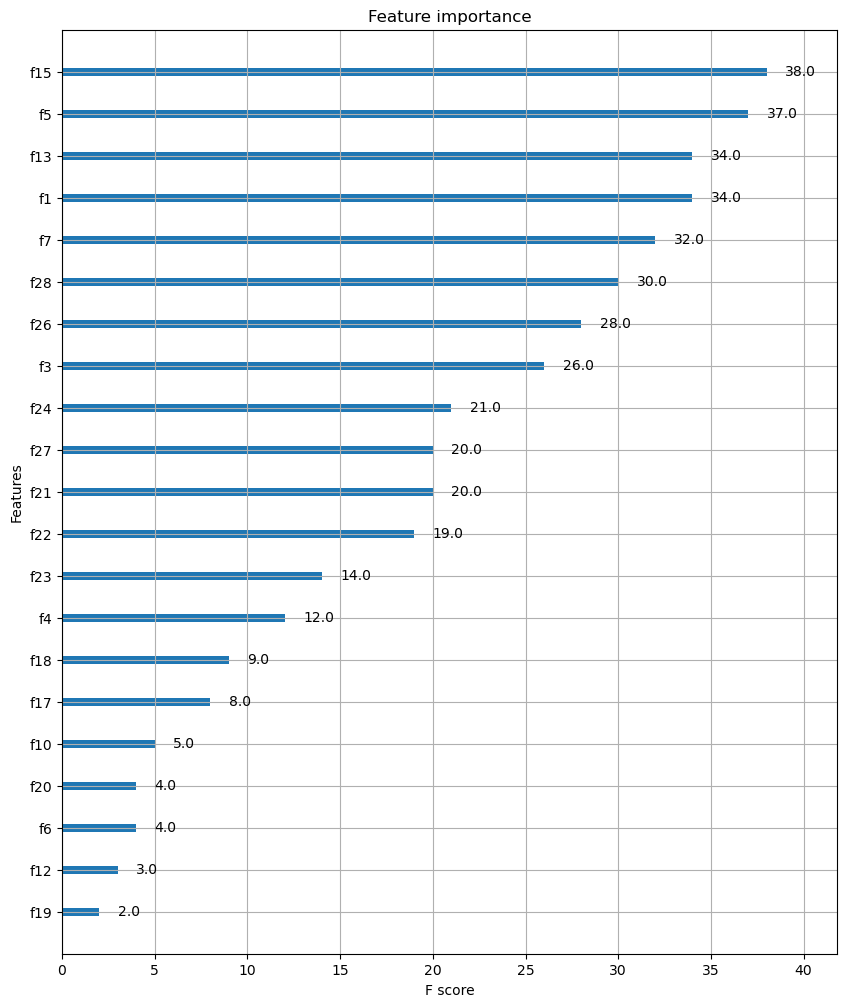

In [29]:
# 1)  xgboost가 제공하는 Plot_importance
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb2, ax=ax)  # feature names 연결 시킬 수 없음

# LightGBM(LGBM)

In [2]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e3/a9/3bfb8f52fee7ab0950bb94920776dbca00b9515ff5fa504374c059d6192c/lightgbm-4.3.0-py3-none-macosx_10_15_x86_64.macosx_11_6_x86_64.macosx_12_5_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import lightgbm

## 위스콘신 유방암 데이터셋

In [ ]:
# 조기 중단 옵션을 사용하지 않은 경우

In [ ]:
# 조기중단 옵션을 사용한 경우

In [ ]:
# 시각화

## CatBoosting